In [1]:
import numpy as np
import scipy
from scipy.misc import imread
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from skimage import filters
from sklearn.ensemble import RandomForestClassifier
import h5py
import skimage.feature

/home/florpi/.local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Load data

In [2]:
hdf5_path = '/media/sf_training/hdf5/'
filename = 'dataset_split_tif.hdf5'

In [3]:
dataset = h5py.File(hdf5_path + filename, 'r')

# Features

In [4]:

def RandomGaussian(image,sigma=2.):
    ftg = filters.gaussian(image,sigma)
    #return np.reshape(ftg, (image.shape[0]*image.shape[1]*3))
    return ftg

def Laplacian(image):
    ftl = filters.laplace(image)
    #return np.reshape(ftl, (image.shape[0]*image.shape[1]*3))   
    return ftl

def HOG(image,orientations=8, pixels_per_cell=4, cells_per_block=1):
    fd, hog_image = skimage.feature.hog(image, orientations=orientations, pixels_per_cell=(pixels_per_cell, \
                    pixels_per_cell),cells_per_block=(cells_per_block, cells_per_block),visualise=True)
    return fd,hog_image

def canny(image, sigma=2., lthres=None, hthres=None):
    fc = skimage.feature.canny(image, sigma=1.0, low_threshold=None, high_threshold=None,\
                      mask=None, use_quantiles=False)
    return fc

def structure_tensor(image, sigma=2.):
    Axx, Axy, Ayy = skimage.feature.structure_tensor(image, sigma=sigma)
    eig = skimage.feature.structure_tensor_eigvals(Axx, Axy, Ayy)[0]
    return eig

def hessian(image,sigma=2.):
    # RETURNS ALL THE COMPONNETS! keep only last?
    fhess = skimage.feature.hessian_matrix(image, sigma=sigma, mode='constant', cval=0,order='xy')
    return fhess[-1]

def harris(image):
    # DOESN'T LOOK VERY PROMISING
    fharris = skimage.feature.corner_harris(image, method='k', k=0.5, eps=1e-08, sigma=2)
    return fharris

def median(image):
    fmed = skimage.filters.median(image, selem=None, out=None, mask=None, shift_x=False, shift_y=False)
    return fmed

def sobel(image):
    fsob = skimage.filters.sobel(image, mask=None)
    return fsob

def gabor(image):
    # Returns complex and imaginary
    fthres =  skimage.filters.gabor(image, frequency=0.6)
    return fthres

# Visualize filters

/home/florpi/.local/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


gaussian


/home/florpi/.local/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


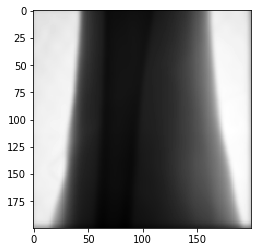

laplacian


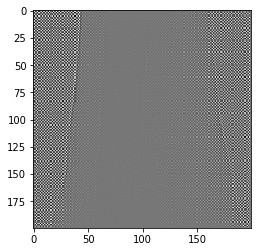

HOG


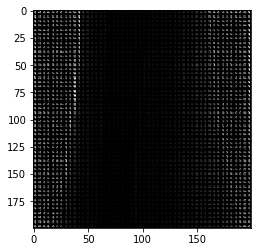

canny


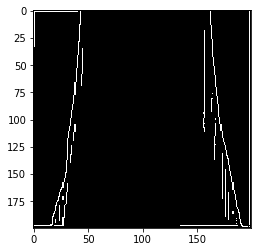

structure_tensor


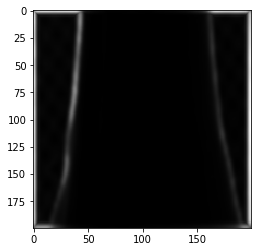

hessian


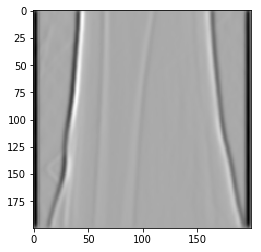

harris_corner


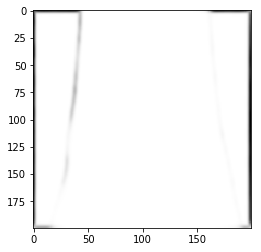

median


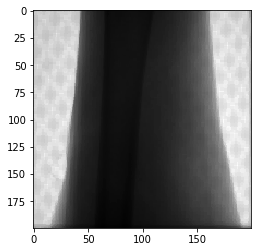

sobel


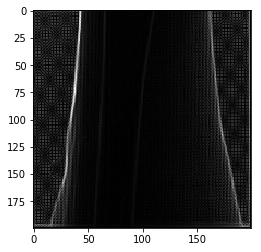

gabor_real


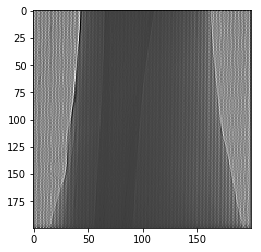

gabor_imaginary


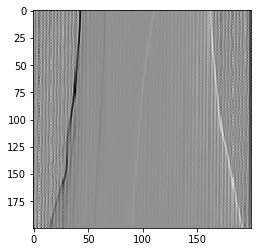

In [9]:
index = 20
visualize_image = dataset['train_img'][index,...]
filters_list = [RandomGaussian(visualize_image), Laplacian(visualize_image), HOG(visualize_image)[1],\
           canny(visualize_image), structure_tensor(visualize_image), hessian(visualize_image),\
           harris(visualize_image), median(visualize_image), sobel(visualize_image), gabor(visualize_image)[0],\
           gabor(visualize_image)[1]]
filters_names = ['gaussian','laplacian','HOG','canny','structure_tensor', 'hessian','harris_corner','median',\
                'sobel','gabor_real','gabor_imaginary']

for (i,f) in enumerate(filters_list):
    print(filters_names[i])
    plt.imshow(f,cmap='gray')
    plt.show()


# Create input for random forest

# Train a random forest classifier

In [ ]:
RF = RandomForestClassifier(verbose=1)

RF.fit(training_images,gt_images)



In [ ]:
asd = RF.predict(test_images)